# Diffusion and related topics


## First passage times and barrier crossing

Similar to our analysis of first passage times and mean residence times, one is often interested in similar quantities for stochastic processes in continuous space. This includes processes like 
 - rate of biochemical reactions when substrates have to be in particular conformation of constellations
 - protein unfolding
 - time to a specific event, like firing of an action potential or phenotypic switching

In most of these cases, the system in question is high dimensional, but often one can identify a suitable "reaction coordinate" that connects stable states across the separatrix that separates different domains of attraction. The illustration below describes the folding and unfolding pathway of a protein.

![transition_state](figures/transition_state.png)
Illustration from [Cho, Levy, and Wolyness](https://www.pnas.org/doi/10.1073/pnas.0509768103)

Most of the considerations below are for one-dimensional reaction coordinates, but can be extended to multidimensional systems.


### General first passage problems in one dimensions

If we consider an interval $[a,b]$ in one dimension, the probability that the particle is still in this interval at time $t$ given it started at position $x$ is 
$$
G(x,t) = \int_a^b dx' p(x',t|x,0)
$$
The mean first exit time is then $-\int_0^\infty dt\, t \partial_t G(x,t)$.
The evolution of $G(x,t)$ itself is best analyzed using the backwards Fokker-Planck equation
$$
\partial_t p(x',t|x,0) = A(x) \partial_x p(x',t|x,0) + \frac{1}{2}B(x) \partial_x^2 p(x',t|x,0)
$$
Note that the sign of the term $A(x)\partial_x p$ is different from the forward equation, and that the differentation is with respect to the initial position $x$. 
We can integrate the above equation over $x'$ to obtain an equation for $G$.
$$
\partial_t G(x,t) = A(x) \partial_x G(x,t) + \frac{1}{2}B(x) \partial_x^2 G(x,t)
$$
With initial and boundary conditions $G(x,0)=1$ (if $a<x<b$) and $G(x,t)=0$ for any $x$ that corresponds to an absorbing boundary. 

#### Mean first passage times
If the time to reach the boundary is long compared to the other modes of the system, the absorbtion process is well described by an exponential decay that is fully characterized by its mean. For this reason, the mean first passage time is often of interest.

In one dimension, the mean first passage time can be worked out exactly. To do so, observe that 
$$
T(x) = -\int_0^\infty dt\, t \partial_t G(x,t) = \int_0^\infty dt\, G(x,t)
$$
Integrating the PDE for $G$ over time, we find
$$
\int_0^\infty dt' \partial_t G(x,t) = G(x,\infty) - G(x,0) = -1 = A(x) \partial_x T(x) + \frac{1}{2}B(x) \partial_x^2 T(x)
$$
The solution to this equation can be expressed in a compact form using the quantity
$$
\psi(x) = \exp\left[\int_a^x dx'\, \frac{2A(x')}{B(x')}\right]
$$
For the case with an reflecting boundary at $x=a$ on the left and an absorbing one at $x=b$ on the right, we have
$$
T(x) = 2 \int_x^bdy \, \frac{1}{\psi(y)} \int_a^y dz\, \frac{\psi(z)}{B(z)}
$$
Equivalent formulae can be written for other configurations of the boundary, see section 5.2 of Gardiner.

### Escape over a barrier
A classic problem in is calculating rates of rare events, for example rates of chemical reactions where the reactants have to go into a high-energy transition state. Based on considerations from statistical mechanics and chemical equilibria, [Arrhenius](https://en.wikipedia.org/wiki/Arrhenius_equation) proposed that chemical reactions should depend on temperature as 
$$
\kappa \sim e^{-\frac{\Delta G}{kT}}
$$
Plotting measured reaction rates on a log scale against $1/T$ is known as Arrhenius plot and the slope of the linear dependence in such a graph allowed to estimate the activation energy $\Delta G$.
Kramers later derived the constant proportionality.

The classic setting to analyze this problem is a escape over a potential barrier as illustrated in graph below. 

Text(0.5, 0, 'reaction coordinate')

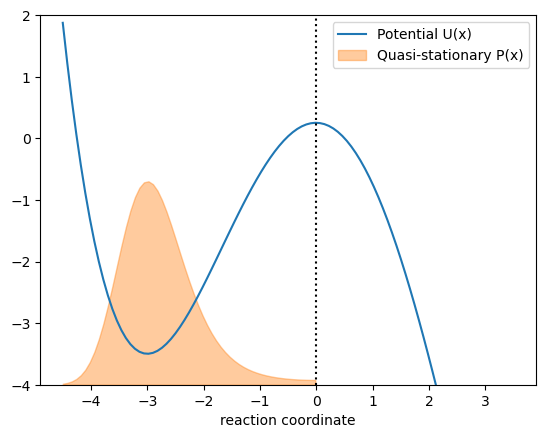

In [42]:
import matplotlib.pyplot as plt
import numpy as np
def U(x): 
    return 0.035*x**4 - x**2 - x

x = np.linspace(-5,3,101)
shift = 0.5
plt.plot(x+shift, U(x), label='Potential U(x)')
plt.fill_between(x[:57]+shift, -4, np.exp(-U(x[:57]))*0.1-4, alpha=0.4, color='C1', label='Quasi-stationary P(x)')
plt.ylim(-4,2)
plt.axvline(0, c='k', ls=':')
plt.legend()
plt.xlabel('reaction coordinate')

The Fokker-Planck equation for this problem takes the form
$$
\partial_t P(x,t) = -\partial_x \left[ -D\partial_x P(x,t) - \mu \frac{dU}{dx} P(x,t)\right] 
$$
where we have written it has a continuity equation with the flux in brackets and expressed the drift velocity as the gradient of a potential and a mobility. 

The key assumption we will make in tackling this problem is that equilibiration on the left of the barrier is much faster than the typical time it takes to escape. In this case, the solution for $P(x,t)$ to the left of the barrier takes the form an approximate equilibrium distribution with a slow decay rate $\lambda$ which is rate of escape: $P(x,t) = p(x)e^{-\lambda t}$ for $x\ll 0$. 
The equation for the stationary density is therefore
$$
\lambda p(x) = \partial_x \left[ -D\partial_x p(x) - \mu \frac{dU}{dx} p(x)\right]
$$
Integrating this gives an equation for the flux 
$$
\lambda \int_{-\infty}^x dx' p(x') = j(x) = D\partial_x p(x) + \mu \frac{dU}{dx} p(x)
$$ 
which vanishes on the far left and increases to a near stationary value close to the transitions state when $\int^x dx' p(x')\approx 1$. 
To analyze the behavior of this equation, I want to briefly introduce the concept of the *dominant balance*. In the vicinity of the energy minimum, $p(x)$ is large and the two most relevant terms in the above equation are $D\partial_x p(x)$ and $\mu \frac{dU}{dx} p(x)$ -- approximate equality between these two terms determines the shape of $p(x)$ and we obtain
$$
p(x) \approx C e^{-\frac{\mu U(x)}{D}}
$$
Obviously, this solution has no flux. But we will fix that in the next step.

Now consider the region on top of the barrier. The density $p(x)$ is much smaller compared here compared to the area around the energy minimum and $\int^x dx' p(x')\approx 1$. 
The steady state solution therefore has approximately constant flux across the barrier. 
$$
\lambda = j = D\partial_x p(x) + \mu \frac{dU}{dx} p(x)
$$
Which can be rearranged to 
$$
\partial_x p(x)  = \frac{j}{D} - \mu \frac{dU}{dx} p(x)
$$
and integrated to yield
$$
p(x) = \frac{j}{D} e^{-\mu\frac{U(x)}{D}}\int_{x_0}^x dx'\, e^{\frac{\mu U(x')}{D}}
$$
This solution with constant flux has its integration constant hidden in the lower boundary of the integral $x_0$. Changing $x_0$ adds or subtracts a constant to the factor multiplying $\frac{j}{D} e^{-\mu\frac{U(x)}{D}}$. To the right of the boundary, we assume an absorbing boundary condition at $x=b$ and $p(b)$ needs to vanish. Hence we just set $x_0 = b$.


### Matching the solution
Above, we derived two solutions that are approximation we expect to be accurate in some parts of the domain. These domains of validity overlap, and in this overlap we can match the solutions:
$$
p(x) = \frac{j}{D} e^{-\mu\frac{U(x)}{D}}\int_{b}^x dx'\, e^{\frac{\mu U(x')}{D}} = Ce^{-\mu\frac{U(x)}{D}}
$$
This immediately reduces to 
$$
j = C\frac{D}{\int_{b}^x dx'\, e^{\frac{\mu U(x')}{D}}}
$$
The constant $C$ stems from the normalization of the solution to the left of the barrier. The integral in the denominator is dominated by the region around the barrier, where we can approximate the exponent of the integrant. 
$$
j = C\frac{D e^{-\frac{U(0)}{D}}}{\int_{b}^x dx'\, e^{-\frac{\mu U'' x^2}{2D}}} = C\frac{D e^{-\mu \frac{U(0)}{D}}}{\sqrt{2\pi D/\mu U''(0)} }
$$
To calculate $C$, note that the normalization integral 
$$
\int_{-\infty}^0 dx \, p(x)
$$
is dominated by the region around the minimum of $U(x)$ at $x=x_m$. We can again approximate the integral in the vicinity of the minimum by a quadratic function to obtain
$$
C^{-1} = \int_{-\infty}^0 dx \, e^{-\mu \frac{U(x)}{D}} \approx e^{-\mu \frac{U(x_m)}{D}}\sqrt{2\pi D/U''(x_m)}
$$
Plugging this into the the expression for $j$, we find
$$
j = \frac{\mu \sqrt{U''(0)U''(x_m)} e^{-\mu \frac{U(0)-U(x_m)}{D}}}{2\pi}
$$
Using the Stokes-Einstein relation, we find the well-known expression for Kramer's escape rate 
$$
j = \frac{\mu \sqrt{U''(0)U''(x_m)} e^{-\frac{\Delta U}{kT}}}{2\pi}
$$
where $\Delta U$ is the energy difference between the energy minimum and the transistion state.
This flux equals the decay rate of the probability distribution. 


## Reaction diffusion
All our analysis so far locally conserved probability and obeyed the continuity equation. 
Much richer behavior is possible if we augment the diffusion equation using so-called reaction terms.
$$
\partial_t c(x,t) = D\partial_x^2 c(x,t) + f(c)
$$
where $f(c)$ is some function of $c$. Without the continuity equation, $c$ should not be thought of as a probability, but rather as a concentration field or density. 


#### Diffusive gradients 
In the simplest case, $f(c) = -c(x,t)/\tau$. This corresponds to a decay of the density with time constant $\tau$.  


### Turing patterns

### Waves